In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

digits = datasets.load_digits()

In [5]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

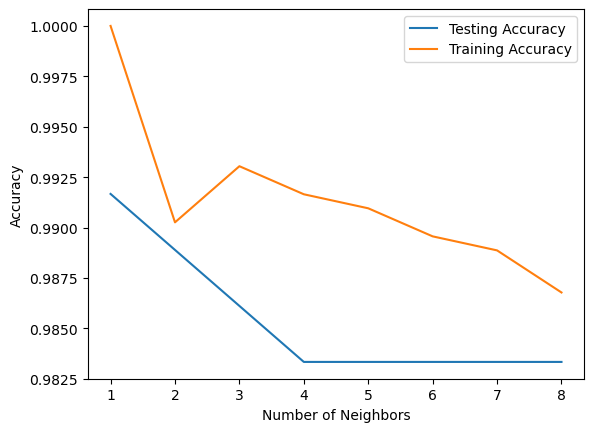

In [61]:
test_accuracy = []
train_accuracy = []
k_num = []
for i in range(1, 9):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(X_train, y_train)
    
    test_accuracy.append(kNN.score(X_test, y_test))
    train_accuracy.append(kNN.score(X_train, y_train))
    k_num.append(i)
    
plt.plot(k_num, test_accuracy, label="Testing Accuracy")
plt.plot(k_num, train_accuracy, label="Training Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

k value that returned the best accuracy for both datasets was k = 1

In [62]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       0.96      1.00      0.98        27
           3       0.98      0.96      0.97        49
           4       0.97      1.00      0.99        33
           5       1.00      0.97      0.99        35
           6       1.00      0.98      0.99        44
           7       1.00      1.00      1.00        32
           8       0.96      1.00      0.98        26
           9       0.97      0.97      0.97        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



[Text(0.5, 23.52222222222222, 'Predicted label'),
 Text(50.722222222222214, 0.5, 'True label')]

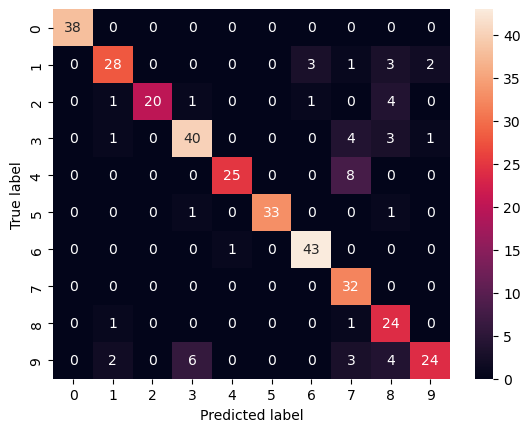

In [66]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True).set(xlabel="Predicted label", ylabel="True label")


In [9]:
bar_plot = []
bar_plot.append(kNN.score(X_test, y_test))
bar_plot.append(svm.score(X_test, y_test))
bar_plot.append(bayes.score(X_test, y_test))


Text(0, 0.5, 'Accuracy')

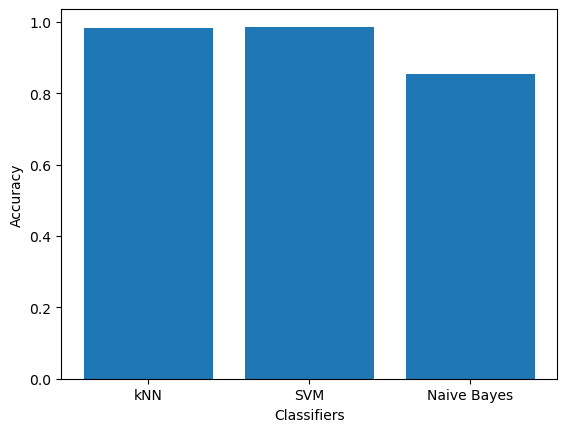

In [10]:
plt.bar(["kNN", "SVM", "Naive Bayes"], bar_plot)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")

In [54]:
#read gapminder data
df = pd.read_csv("gapminder.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


C:\Users\James\AppData\Local\Temp\ipykernel_1484\3213223295.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="RdYlGn")


<Axes: >

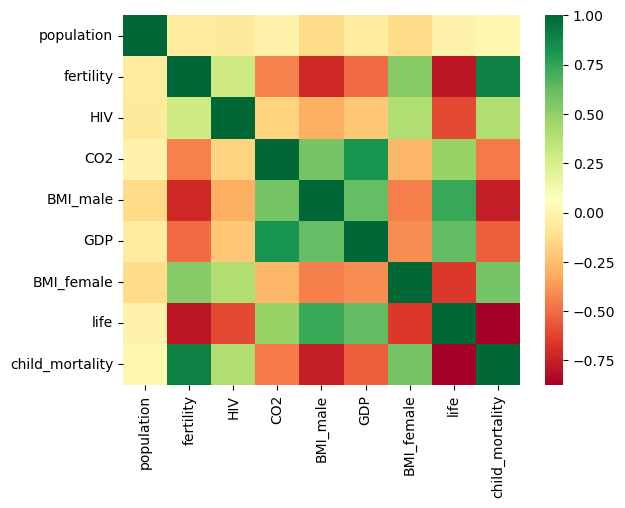

In [58]:
sns.heatmap(df.corr(), cmap="RdYlGn")

In [30]:
x = df["fertility"]
y = df["life"]

regression = LinearRegression()
regression.fit(x[:, None], y)
print(regression.score(x[:, None], y))

0.6192442167740035


C:\Users\James\AppData\Local\Temp\ipykernel_1484\2221580541.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regression.fit(x[:, None], y)
C:\Users\James\AppData\Local\Temp\ipykernel_1484\2221580541.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(regression.score(x[:, None], y))


C:\Users\James\AppData\Local\Temp\ipykernel_1484\1880531586.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fig, ax = plt.plot(x, y, 'bo', x, regression.predict(x[:, None]), '-k')


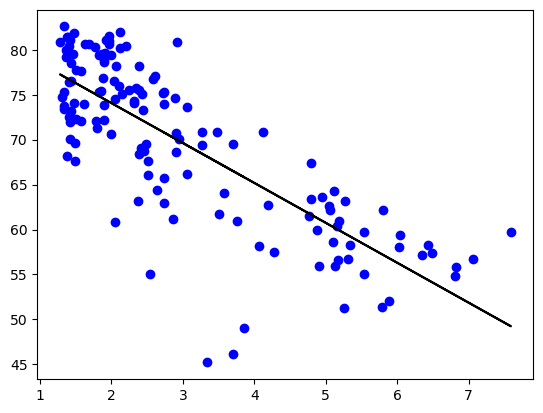

In [31]:
fig, ax = plt.plot(x, y, 'bo', x, regression.predict(x[:, None]), '-k')

In [37]:
X = df[["fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]]
y = df["life"]

regression = LinearRegression()
regression.fit(X, y)
print(regression.score(X, y))

0.8974995317332959


Higher level of accuracy using more features

In [38]:
cross_val_score(regression, x[:,None], y, cv=5)

C:\Users\James\AppData\Local\Temp\ipykernel_1484\1470271512.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cross_val_score(regression, x[:,None], y, cv=5)


array([0.71001079, 0.75007717, 0.55271526, 0.547501  , 0.52410561])

In [39]:
cross_val_score(regression, X, y, cv=5)

array([0.81621881, 0.8322471 , 0.90868335, 0.81325568, 0.94404223])

The use of all features resulted in higher accuracy

In [41]:
#load credit card data
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [46]:
#seperate data by "Class"
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]


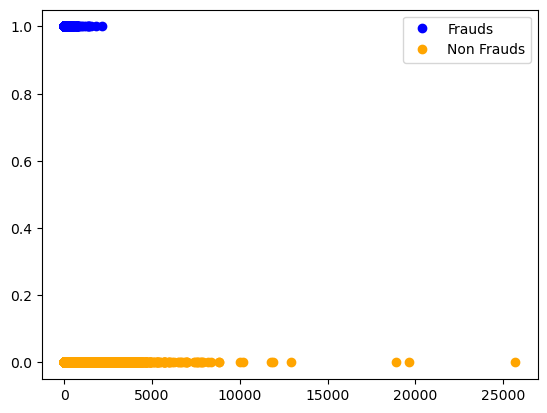

In [60]:
plt.plot(frauds.Amount, frauds.Class, 'o', color="blue", label="Frauds")
plt.plot(non_frauds.Amount, non_frauds.Class, 'o', color="orange", label="Non Frauds")
plt.legend()

[[284156    159]
 [   150    342]]


C:\Users\James\anaconda3\envs\3803\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

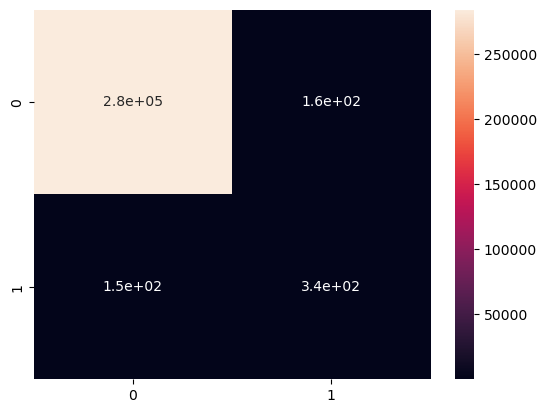

In [53]:
X = df.drop("Class", axis=1)
y = df.Class

log_regression = LogisticRegression()
log_regression.fit(X, y)
y_pred = log_regression.predict(X)
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True)